In [461]:
#importar os pandas e numpy 
import pandas as pd
import numpy as np

In [462]:
#criação da base dos dados
base = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [463]:
#visualização dos dados
base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [464]:
#retornar o shape da base
base.shape

(1460, 81)

In [465]:
#visualização das informações
base.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [466]:
#visualizando os valores vazios obtemos:
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [467]:
#precisamos eliminar as colunas com mais de 10% de valores vazios para não gerar problemas no futuro
eliminar = base.columns[(base.isnull().sum()/base.shape[0])>0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [468]:
#eliminar as colunas
base = base.drop(eliminar, axis=1)
base

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [469]:
#visualizar os novos valores vazios
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
WoodDeckSF      0.000000
PavedDrive      0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
HalfBath        0.000000
dtype: float64

In [470]:
#selecionar apenas as colunas numéricas
col_num= base.columns[base.dtypes != "object"]
col_num

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [471]:
#criar nova base
base_nova = base.loc[:,col_num]
base_nova.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [472]:
#verificar se ainda tem valores vazios na nova base
base_nova.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
Id              0
dtype: int64

In [473]:
#substituir valores vazios por -1
base_nova = base_nova.fillna(-1)
#essa será a nova base inicial 
base_nova

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [474]:
#selecionar x e y
X = base_nova.drop("SalePrice", axis=1)
y = base_nova.SalePrice

In [475]:
from sklearn.model_selection import train_test_split

In [476]:
#separar base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [477]:
#importar a Regressão Linear
from sklearn.linear_model import LinearRegression

In [478]:
#criando o regressor e fazendo o fit com os meus dados de treino
reg_rl = LinearRegression().fit(X_train,y_train)

In [479]:
#fazendo a previsão pros dados de teste
y_rl = reg_rl.predict(X_test)

In [480]:
#importar a árvore de regressão
from sklearn import tree


In [481]:
#criar o regressor e fazer o fit com os dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [482]:
#fazer minha previsão usando a arvore
y_ar = reg_ar.predict(X_test)

In [483]:
#importar o KNN
from sklearn.neighbors import KNeighborsRegressor

In [484]:
#criando o regressor e fazer o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [485]:
#fazer a previsão usando o KNN
y_knn = reg_knn.predict(X_test)

In [486]:
#importar tanto o erro médio absoluto quanto o quadrático 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [487]:
#avaliar o erro da regressão
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

23763.187393064523
1533982883.44486


In [488]:
#agora avaliar os erros da arvore de decisão
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

27580.78838174274
2530245114.701245


In [489]:
#agora do KNN
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

33273.08298755187
2733937586.841286


In [490]:
#importar o matplotlib para visualização gráfica
import matplotlib.pyplot as plt

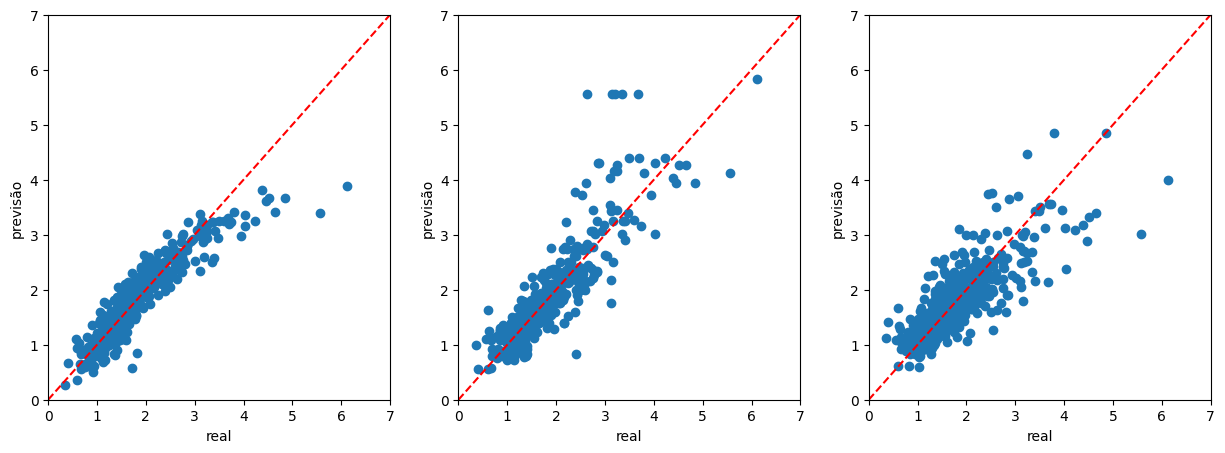

In [491]:
#criação do gráfico
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test/100000, y_rl/100000)
ax[0].plot([0,700000],[0,700000], "--r")
ax[1].scatter(y_test/100000, y_ar/100000)
ax[1].plot([0,700000],[0,700000], "--r")
ax[2].scatter(y_test/100000, y_knn/100000)
ax[2].plot([0,700000],[0,700000], "--r")

ax[0].set(xlim=(0,7),ylim=(0,7))
ax[0].set_xlabel("real")
ax[0].set_ylabel("previsão")
ax[1].set(xlim=(0,7),ylim=(0,7))
ax[1].set_xlabel("real")
ax[1].set_ylabel("previsão")
ax[2].set(xlim=(0,7),ylim=(0,7))
ax[2].set_xlabel("real")
ax[2].set_ylabel("previsão")
plt.show()



In [492]:
#vou focar na regressão linear por ter sido o algoritmo com menor erro quadrático médio

In [493]:
#importar a base de teste
teste = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [494]:
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [495]:
#agora precisamos aplicar todos os tratamentos anteriores na base de teste

In [496]:
#eliminar mesmas colunas da base de treino
teste = teste.drop(eliminar, axis=1)

In [497]:
#verificar as colunas numéricas
col_num2 = teste.columns[teste.dtypes != "object"]
col_num2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [498]:
#mantendo também apenas as colunas númericas
teste = teste.loc[:,col_num2]

In [499]:
#verificar bases restantes
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [500]:
#visualizar quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False).head(11)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
OpenPorchSF      0
dtype: int64

In [501]:
#substituir valores vazios por -1
teste = teste.fillna(-1)

In [502]:
#utilizar a regressão linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [503]:
#adicionar a coluna de previsão na base
teste["SalePrice"] =y_pred

In [504]:
#extrair o Id e o SalePrice
resultado = teste[["Id", "SalePrice"]]
resultado.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [505]:
#exportar a base para csv
resultado.to_csv("resultado.csv", index = False)